In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pygenn import GeNNModel, init_postsynaptic, init_weight_update
import time
import matplotlib
from IPython import display
import pylab as pl

%matplotlib inline

# Efficient solution validation of constraint satisfaction problems on neuromorphic hardware: the case of Sudoku puzzles

This work presents a novel approach to address Constraint Satisfaction Problems through Spiking Neural Networks (SNNs) utilising neuromorphic tools like the GeNN framework and the SpiNNaker platform. We propose a new fully spiking pipeline that incorporates a constraint stabilization strategy, a neuron idling mechanism, and a built-in validation procedure. Our pipeline targets efficiency and performance of SNN-based solvers for Sudoku puzzles, leading to improvements in success rates and data transmission compared to previous solutions. Specifically, the reduction of extracted spikes, ranging from 54.63% to 99.98%, provides extraction time reduced by values between 88.56% and 96.41%. This results in significant enhancements in terms of energy efficiency and computational performance. Therefore, we show further evidence of the potential advantages of brain-inspired approaches that rely on neuromorphic HW for implementing effective and low-power solutions, which are suitable for real-world problems that characterise constrained key technological domains such as AI, IoT and Industry 4.0.

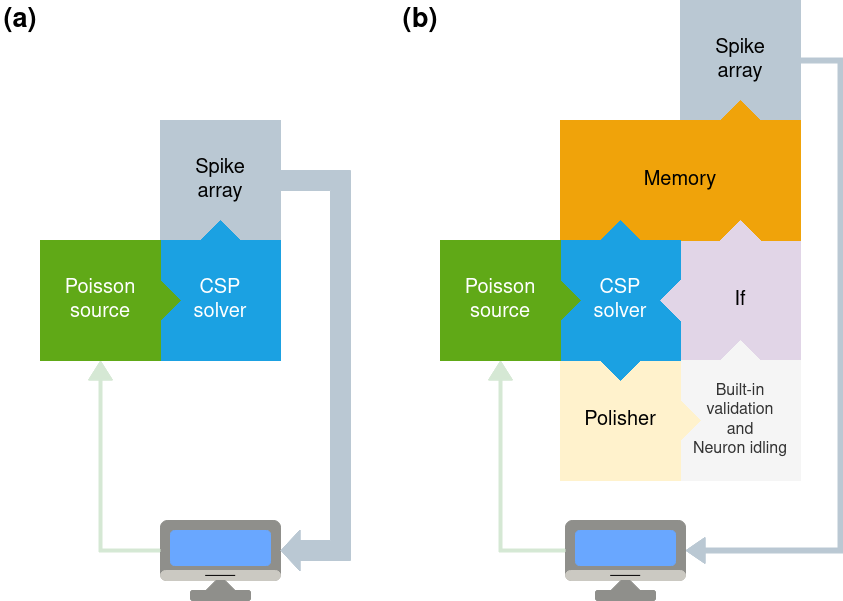

Building blocks of the fundamental (a) and enhanced (b) pipeline. In (a), the solution proposed by [Fonseca et al., 2017](https://www.frontiersin.org/journals/neuroscience/articles/10.3389/fnins.2017.00714/full) is depicted, with the CSP solver in charge of identifying the solution of the given problem. The *Poisson source* and *Spike array* blocks can be thought of as the spiking input and output respectively. The output collected from this latter needs to be transmitted out of the neuromorphic platform to be validated. The enhanced pipeline (b) introduces additional blocks to implement both a stop condition and the solution validation on neuromorphic hardware. By embedding such operations, and hence by taking advantage of entirely spike-based computation for both solving the problem and validating the solution, it largely reduces the amount of data to be transmitted back from the neuromorphic platform. Consequently, the time required for such operation is significantly lowered, and the computational cost of validating the found solution on non-neuromorphic hardware is completely removed.


We tested our fully spiking approach on nine Sudoku puzzles belonging to three different difficulty classes: easy, medium and hard. Specifically, we used the ones from [Fonseca et al., 2017](https://www.frontiersin.org/journals/neuroscience/articles/10.3389/fnins.2017.00714/full) belonging to the easy and hard classes and we added a selection of puzzles from [Mantere et al., 2007](https://ieeexplore.ieee.org/document/4424632).

In [ ]:
# http://lipas.uwasa.fi/~timan/sudoku/

popEasy1 = 27  # 27
sudokuEasy1 = [
    [0, 4, 0, 8, 0, 5, 2, 0, 0],
    [0, 2, 0, 0, 4, 0, 0, 5, 0],
    [5, 0, 0, 0, 0, 0, 0, 0, 4],
    [0, 9, 0, 0, 0, 3, 1, 2, 0],
    [1, 0, 6, 0, 7, 8, 0, 0, 3],
    [3, 7, 0, 9, 0, 4, 0, 8, 0],
    [0, 0, 0, 0, 0, 6, 7, 0, 0],
    [0, 0, 8, 3, 5, 9, 0, 1, 0],
    [0, 1, 9, 0, 0, 7, 6, 0, 0]
]
sudokuEasy1Sol = [
    [9, 4, 7, 8, 3, 5, 2, 6, 1],
    [6, 2, 3, 7, 4, 1, 8, 5, 9],
    [5, 8, 1, 6, 9, 2, 3, 7, 4],
    [8, 9, 4, 5, 6, 3, 1, 2, 7],
    [1, 5, 6, 2, 7, 8, 9, 4, 3],
    [3, 7, 2, 9, 1, 4, 5, 8, 6],
    [4, 3, 5, 1, 2, 6, 7, 9, 8],
    [7, 6, 8, 3, 5, 9, 4, 1, 2],
    [2, 1, 9, 4, 8, 7, 6, 3, 5]
]

popEasy2 = 28  # s10a.txt
sudokuEasy2 = [
    [0, 0, 2, 0, 0, 0, 5, 0, 0],
    [0, 1, 0, 7, 0, 5, 0, 2, 0],
    [4, 0, 0, 0, 9, 0, 0, 0, 7],
    [0, 4, 9, 0, 0, 0, 7, 3, 0],
    [8, 0, 1, 0, 3, 0, 4, 0, 9],
    [0, 3, 6, 0, 0, 0, 2, 1, 0],
    [2, 0, 0, 0, 8, 0, 0, 0, 4],
    [0, 8, 0, 9, 0, 2, 0, 6, 0],
    [0, 0, 7, 0, 0, 0, 8, 0, 0]
]
sudokuEasy2Sol = [
    [9, 7, 2, 8, 6, 3, 5, 4, 1],
    [6, 1, 8, 7, 4, 5, 9, 2, 3],
    [4, 5, 3, 2, 9, 1, 6, 8, 7],
    [5, 4, 9, 1, 2, 8, 7, 3, 6],
    [8, 2, 1, 6, 3, 7, 4, 5, 9],
    [7, 3, 6, 4, 5, 9, 2, 1, 8],
    [2, 9, 5, 3, 8, 6, 1, 7, 4],
    [1, 8, 4, 9, 7, 2, 3, 6, 5],
    [3, 6, 7, 5, 1, 4, 8, 9, 2]
]

popEasy3 = 28  # s10b.txt
sudokuEasy3 = [
    [0, 5, 0, 0, 1, 0, 0, 4, 0],
    [1, 0, 7, 0, 0, 0, 6, 0, 2],
    [0, 0, 0, 9, 0, 5, 0, 0, 0],
    [2, 0, 8, 0, 3, 0, 5, 0, 1],
    [0, 4, 0, 0, 7, 0, 0, 2, 0],
    [9, 0, 1, 0, 8, 0, 4, 0, 6],
    [0, 0, 0, 4, 0, 1, 0, 0, 0],
    [3, 0, 4, 0, 0, 0, 7, 0, 9],
    [0, 2, 0, 0, 6, 0, 0, 1, 0]
]
sudokuEasy3Sol = [
    [8, 5, 2, 7, 1, 6, 9, 4, 3],
    [1, 9, 7, 8, 4, 3, 6, 5, 2],
    [4, 6, 3, 9, 2, 5, 1, 8, 7],
    [2, 7, 8, 6, 3, 4, 5, 9, 1],
    [6, 4, 5, 1, 7, 9, 3, 2, 8],
    [9, 3, 1, 5, 8, 2, 4, 7, 6],
    [7, 8, 6, 4, 9, 1, 2, 3, 5],
    [3, 1, 4, 2, 5, 8, 7, 6, 9],
    [5, 2, 9, 3, 6, 7, 8, 1, 4]
]

popEasy4 = 28  # s10b.txt
sudokuEasy4 = [
    [2, 0, 0, 9, 7, 8, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 9, 0, 5],
    [0, 0, 0, 0, 0, 0, 0, 0, 4],
    [7, 8, 2, 0, 0, 0, 0, 0, 0],
    [0, 9, 0, 0, 0, 0, 1, 0, 0],
    [3, 0, 0, 0, 0, 7, 0, 0, 9],
    [9, 0, 5, 6, 0, 0, 4, 3, 0],
    [0, 0, 0, 0, 3, 0, 0, 1, 0],
    [0, 0, 7, 2, 0, 0, 0, 0, 0]
]
sudokuEasy4Sol = [
    [2, 5, 4, 9, 7, 8, 3, 6, 1],
    [8, 7, 3, 4, 1, 6, 9, 2, 5],
    [6, 1, 9, 5, 2, 3, 7, 8, 4],
    [7, 8, 2, 1, 9, 5, 6, 4, 3],
    [5, 9, 6, 3, 4, 2, 1, 7, 8],
    [3, 4, 1, 8, 6, 7, 2, 5, 9],
    [9, 2, 5, 6, 8, 1, 4, 3, 7],
    [4, 6, 8, 7, 3, 9, 5, 1, 2],
    [1, 3, 7, 2, 5, 4, 8, 9, 6]
]

puzzleEasy = {
    1: [popEasy1, np.array(sudokuEasy1), np.array(sudokuEasy1Sol)],
    2: [popEasy2, np.array(sudokuEasy2), np.array(sudokuEasy2Sol)],
    3: [popEasy3, np.array(sudokuEasy3), np.array(sudokuEasy3Sol)],
    4: [popEasy4, np.array(sudokuEasy4), np.array(sudokuEasy4Sol)],
}


popMed1 = 27
sudokuMed1 = [
    [9, 0, 4, 0, 0, 0, 5, 0, 1],
    [6, 0, 0, 5, 0, 0, 0, 0, 7],
    [2, 5, 7, 8, 0, 0, 6, 0, 0],
    [0, 0, 0, 0, 0, 0, 4, 0, 6],
    [1, 0, 0, 0, 0, 0, 7, 0, 3],
    [0, 0, 0, 3, 9, 6, 0, 0, 0],
    [0, 0, 0, 4, 0, 0, 0, 0, 0],
    [0, 2, 0, 0, 6, 0, 0, 8, 0],
    [0, 6, 0, 9, 2, 8, 0, 7, 4]
]
sudokuMed1Sol = [
    [9, 8, 4, 6, 7, 2, 5, 3, 1],
    [6, 1, 3, 5, 4, 9, 8, 2, 7],
    [2, 5, 7, 8, 3, 1, 6, 4, 9],
    [8, 3, 2, 1, 5, 7, 4, 9, 6],
    [1, 9, 6, 2, 8, 4, 7, 5, 3],
    [7, 4, 5, 3, 9, 6, 2, 1, 8],
    [3, 7, 8, 4, 1, 5, 9, 6, 2],
    [4, 2, 9, 7, 6, 3, 1, 8, 5],
    [5, 6, 1, 9, 2, 8, 3, 7, 4]
]

popMed2 = 27  # s11a.txt
sudokuMed2 = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 7, 9, 0, 5, 0, 1, 8, 0],
    [8, 0, 0, 0, 0, 0, 0, 0, 7],
    [0, 0, 7, 3, 0, 6, 8, 0, 0],
    [4, 5, 0, 7, 0, 8, 0, 9, 6],
    [0, 0, 3, 5, 0, 2, 7, 0, 0],
    [7, 0, 0, 0, 0, 0, 0, 0, 5],
    [0, 1, 6, 0, 3, 0, 4, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
]
sudokuMed2Sol = [
    [3, 4, 5, 8, 7, 1, 2, 6, 9],
    [2, 7, 9, 6, 5, 3, 1, 8, 4],
    [8, 6, 1, 4, 2, 9, 5, 3, 7],
    [1, 9, 7, 3, 4, 6, 8, 5, 2],
    [4, 5, 2, 7, 1, 8, 3, 9, 6],
    [6, 8, 3, 5, 9, 2, 7, 4, 1],
    [7, 3, 8, 2, 6, 4, 9, 1, 5],
    [5, 1, 6, 9, 3, 7, 4, 2, 8],
    [9, 2, 4, 1, 8, 5, 6, 7, 3]
]

popMed3 = 27  # s11b.txt
sudokuMed3 = [
    [0, 0, 0, 0, 0, 0, 0, 8, 5],
    [0, 0, 0, 2, 1, 0, 0, 0, 9],
    [9, 6, 0, 0, 8, 0, 1, 0, 0],
    [5, 0, 0, 8, 0, 0, 0, 1, 6],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [8, 9, 0, 0, 0, 6, 0, 0, 7],
    [0, 0, 9, 0, 7, 0, 0, 5, 2],
    [3, 0, 0, 0, 5, 4, 0, 0, 0],
    [4, 8, 0, 0, 0, 0, 0, 0, 0]
]
sudokuMed3Sol = [
    [1, 3, 2, 6, 4, 9, 7, 8, 5],
    [7, 5, 8, 2, 1, 3, 6, 4, 9],
    [9, 6, 4, 7, 8, 5, 1, 2, 3],
    [5, 4, 3, 8, 9, 7, 2, 1, 6],
    [2, 7, 6, 5, 3, 1, 8, 9, 4],
    [8, 9, 1, 4, 2, 6, 5, 3, 7],
    [6, 1, 9, 3, 7, 8, 4, 5, 2],
    [3, 2, 7, 1, 5, 4, 9, 6, 8],
    [4, 8, 5, 9, 6, 2, 3, 7, 1]
]

puzzleMed = {
    1: [popMed1, np.array(sudokuMed1), np.array(sudokuMed1Sol)],
    2: [popMed2, np.array(sudokuMed2), np.array(sudokuMed2Sol)],
    3: [popMed3, np.array(sudokuMed3), np.array(sudokuMed3Sol)],
}


popHard1 = 27
sudokuHard1 = [
    [6, 4, 9, 8, 0, 1, 0, 0, 0],
    [8, 0, 7, 0, 0, 0, 6, 0, 0],
    [0, 0, 0, 0, 7, 0, 0, 0, 4],
    [1, 8, 0, 0, 6, 0, 4, 0, 9],
    [0, 0, 0, 0, 1, 0, 3, 7, 0],
    [0, 0, 0, 0, 0, 0, 5, 0, 0],
    [7, 0, 0, 0, 8, 0, 0, 9, 0],
    [0, 0, 0, 3, 0, 0, 7, 0, 5],
    [0, 9, 6, 0, 5, 0, 0, 3, 0]
]
sudokuHard1Sol = [
    [6, 4, 9, 8, 3, 1, 2, 5, 7],
    [8, 2, 7, 5, 4, 9, 6, 1, 3],
    [5, 3, 1, 6, 7, 2, 9, 8, 4],
    [1, 8, 5, 7, 6, 3, 4, 2, 9],
    [9, 6, 2, 4, 1, 5, 3, 7, 8],
    [3, 7, 4, 9, 2, 8, 5, 6, 1],
    [7, 5, 3, 2, 8, 4, 1, 9, 6],
    [2, 1, 8, 3, 9, 6, 7, 4, 5],
    [4, 9, 6, 1, 5, 7, 8, 3, 2]
]

popHard2 = 27  # s12a.txt
sudokuHard2 = [
    [0, 0, 0, 0, 0, 3, 0, 1, 7],
    [0, 1, 5, 0, 0, 9, 0, 0, 8],
    [0, 6, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 7, 0, 0, 0],
    [0, 0, 9, 0, 0, 0, 2, 0, 0],
    [0, 0, 0, 5, 0, 0, 0, 0, 4],
    [0, 0, 0, 0, 0, 0, 0, 2, 0],
    [5, 0, 0, 6, 0, 0, 3, 4, 0],
    [3, 4, 0, 2, 0, 0, 0, 0, 0]
]
sudokuHard2Sol = [
    [2, 9, 4, 8, 6, 3, 5, 1, 7],
    [7, 1, 5, 4, 2, 9, 6, 3, 8],
    [8, 6, 3, 7, 5, 1, 4, 9, 2],
    [1, 5, 2, 9, 4, 7, 8, 6, 3],
    [4, 7, 9, 3, 8, 6, 2, 5, 1],
    [6, 3, 8, 5, 1, 2, 9, 7, 4],
    [9, 8, 6, 1, 3, 4, 7, 2, 5],
    [5, 2, 1, 6, 7, 8, 3, 4, 9],
    [3, 4, 7, 2, 9, 5, 1, 8, 6]
]

popHard3 = 27  # s12b.txt
sudokuHard3 = [
    [3, 8, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 4, 0, 0, 7, 8, 5],
    [0, 0, 9, 0, 2, 0, 3, 0, 0],
    [0, 6, 0, 0, 9, 0, 0, 0, 0],
    [8, 0, 0, 3, 0, 2, 0, 0, 9],
    [0, 0, 0, 0, 4, 0, 0, 7, 0],
    [0, 0, 1, 0, 7, 0, 5, 0, 0],
    [4, 9, 5, 0, 0, 6, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 9, 2]
]
sudokuHard3Sol = [
    [3, 8, 4, 5, 6, 7, 9, 2, 1],
    [1, 2, 6, 4, 3, 9, 7, 8, 5],
    [7, 5, 9, 8, 2, 1, 3, 4, 6],
    [5, 6, 3, 7, 9, 8, 2, 1, 4],
    [8, 4, 7, 3, 1, 2, 6, 5, 9],
    [9, 1, 2, 6, 4, 5, 8, 7, 3],
    [2, 3, 1, 9, 7, 4, 5, 6, 8],
    [4, 9, 5, 2, 8, 6, 1, 3, 7],
    [6, 7, 8, 1, 5, 3, 4, 9, 2]
]

puzzleHard = {
    1: [popHard1, np.array(sudokuHard1), np.array(sudokuHard1Sol)],
    2: [popHard2, np.array(sudokuHard2), np.array(sudokuHard2Sol)],
    3: [popHard3, np.array(sudokuHard3), np.array(sudokuHard3Sol)],
}

## Problem Definition

In order to produce a comprehensive analysis, and a valuable comparison, we solved the puzzles with four different strategies, all of them based on the same CSP solver:

- a) as in [Fonseca et al., 2017](https://www.frontiersin.org/journals/neuroscience/articles/10.3389/fnins.2017.00714/full) to obtain the baselines for our fully spiking approach;
- b) by including constraint stabilization only;
- c) by including neuron idling and built-in validation only;
- d) by merging *b* and *c*.

easily settable via the parameters:
- difficulty: `easy`, `medium`, `hard`
- puzzleType: `1`, `2`, `3`
- constraintStabilization: `False`, `True`
- builtInValidation: `False`, `True`

In [ ]:
##### Configurations #####
difficulty = 'easy'
puzzleType = 1
constraintStabilization = True
builtInValidation = True
os.environ['CUDA_PATH'] = '/usr/local/cuda'; backend = 'cuda'
# backend = 'single_threaded_cpu'

In [ ]:
puzzle = None
if difficulty == 'easy':
    puzzle = puzzleEasy
elif difficulty == 'med':
    puzzle = puzzleMed
elif difficulty == 'hard':
    puzzle = puzzleHard

(sudokuPop, sudoku, sudokuSol) = puzzle[puzzleType]

variables = 9

In [ ]:
##### Sudoku plot #####
space = 1000
axes = np.linspace(start=-space, stop=space, num=variables)
offset = space/(variables-1)
positions = [(x, y) for y in np.flip(axes) for x in axes]

figsize, digitsize, maxwidth = 4.8, 200, 3
figsize = np.array((figsize, figsize))*2
plt.figure(figsize=figsize)

plt.title('Sudoku', fontdict={'fontsize': 30})
for i, (x, y) in enumerate(positions):
    digit = sudoku.flatten()[i]
    if digit != 0:
        plt.scatter(x=x, y=y, marker=f'${digit}$', color='#000000', s=digitsize)

for i, axis in enumerate(axes):
    linewidth = 1
    if i%3 == 0:
        linewidth = maxwidth
    plt.vlines(x=axis-offset, ymin=-space-offset, ymax=space+offset, linewidth=linewidth, colors='#000000')
    plt.hlines(y=axis-offset, xmin=-space-offset, xmax=space+offset, linewidth=linewidth, colors='#000000')
plt.vlines(x=axes[-1]+offset, ymin=-space-offset, ymax=space+offset, linewidth=maxwidth, colors='#000000')
plt.hlines(y=axes[-1]+offset, xmin=-space-offset, xmax=space+offset, linewidth=maxwidth, colors='#000000')

plt.xticks([])
plt.yticks([])
plt.box(False)

##### Sudoku solution plot #####
figsize, digitsize, maxwidth = 4.8, 200, 3
figsize = np.array((figsize, figsize))*2
plt.figure(figsize=figsize)

plt.title('Sudoku Solution', fontdict={'fontsize': 30})
for i, (x, y) in enumerate(positions):
    digit = sudokuSol.flatten()[i]
    if digit != 0:
        plt.scatter(x=x, y=y, marker=f'${digit}$', color='#005BB8', s=digitsize)
    digit = sudoku.flatten()[i]
    if digit != 0:
        plt.scatter(x=x, y=y, marker=f'${digit}$', color='#000000', s=digitsize)

for i, axis in enumerate(axes):
    linewidth = 1
    if i%3 == 0:
        linewidth = maxwidth
    plt.vlines(x=axis-offset, ymin=-space-offset, ymax=space+offset, linewidth=linewidth, colors='#000000')
    plt.hlines(y=axis-offset, xmin=-space-offset, xmax=space+offset, linewidth=linewidth, colors='#000000')
plt.vlines(x=axes[-1]+offset, ymin=-space-offset, ymax=space+offset, linewidth=maxwidth, colors='#000000')
plt.hlines(y=axes[-1]+offset, xmin=-space-offset, xmax=space+offset, linewidth=maxwidth, colors='#000000')

plt.xticks([])
plt.yticks([])
plt.box(False)

## Model definition

### Neuron populations as elemental units

Every single cell of the Sudoku puzzle is modelled employing 9 populations of LIF neurons, one for each possible digit, connected one to another through a mechanism of internal inhibition scheme results in the so-called winner-take-all configuration [Khona et al., 2022](https://arxiv.org/abs/2112.03978#): a single population can remain active while suppressing all the other ones, to ensure that each cell takes a single value at a time.

The specific neuron model implemented is a current-based (CuBa) LIF [Tsodyks et al., 2000](https://pubmed.ncbi.nlm.nih.gov/10627627/), [Fonseca et al., 2017](https://www.frontiersin.org/journals/neuroscience/articles/10.3389/fnins.2017.00714/full), with membrane potential and synaptic current described in time by Equation below:

$$
\frac{dV_m(t)}{dt}=\frac{I_{syn}(t)+I_{offset}}{C_m}-\frac{V_m(t)-V_{rest}}{\tau_m} \\
\tau_d\frac{dI_{syn}(t)}{dt}=-I_{syn}(t)+I_{spike}(t-t_s)
$$

where $V_m(t)$ is the membrane potential; $V_{rest}$ is the leaky component; $C_m$ models the membrane capacitance; $\tau_m$ is the temporal decay constant for the membrane potential; $I_{offset}$ is an additional bias current to control the internal dynamics; $I_{spike}=w \delta(t-t_s)$ is the contribution through the synaptic weight $w$ of the incoming spiking activity occurring at time $t_s$; $\tau_d$ is the temporal decay constant for the synaptic components. Each time the membrane potential reaches a threshold voltage $V_{th}$, a spike is emitted and the membrane voltage is reset to a value $V_{reset}$ for a time $\tau_{reset}$.

In [ ]:
model = GeNNModel(precision='float', model_name=f'.sudoku', backend=backend)
model.dt = 1.0  # ms

##### Neuron parameters #####
lifParam = {
    'C': 0.25,  # nF
    'TauM': 20.0,  # ms
    'Ioffset': 0.3,  # nA
    'Vrest': -65.0,  # mV
    'Vthresh': -50.0,  # mV
    'Vreset': -70.0,  # mV
    'TauRefrac': 2.0,  # ms
}
lifVar = {
    'V': lifParam['Vrest'],  # mV
    'RefracTime': 0.0,  # ms
}

In [ ]:
# ##### Populations neurons ##### #
solverPop = sudokuPop

popStim = [[0 for _ in range(variables)] for _ in range(variables)]
for row in range(variables):
    for col in range(variables):
        popStim[row][col] = model.add_neuron_population(
            pop_name=f'stim{row}{col}',
            num_neurons=variables*solverPop,
            neuron='Poisson',
            params={'rate': 20}, vars={'timeStepToSpike': 0}
        )

popVar = [[0 for _ in range(variables)] for _ in range(variables)]
for row in range(variables):
    for col in range(variables):
        popVar[row][col] = model.add_neuron_population(
            pop_name=f'var{row}{col}',
            num_neurons=variables*solverPop,
            neuron='LIF',
            params=lifParam, vars=lifVar
        )
        popVar[row][col].spike_recording_enabled = True

Across cells, populations representing the same value are connected to implement lateral inhibition, ensuring that a single value can not appear more than once along a row, column, or sub-square. Additionally, all the populations have a further synaptic connections to so-called stimulus populations, whose purpose is to keep available the number that the cell can assume. A schematic of the inter-population connections is reported in Figure 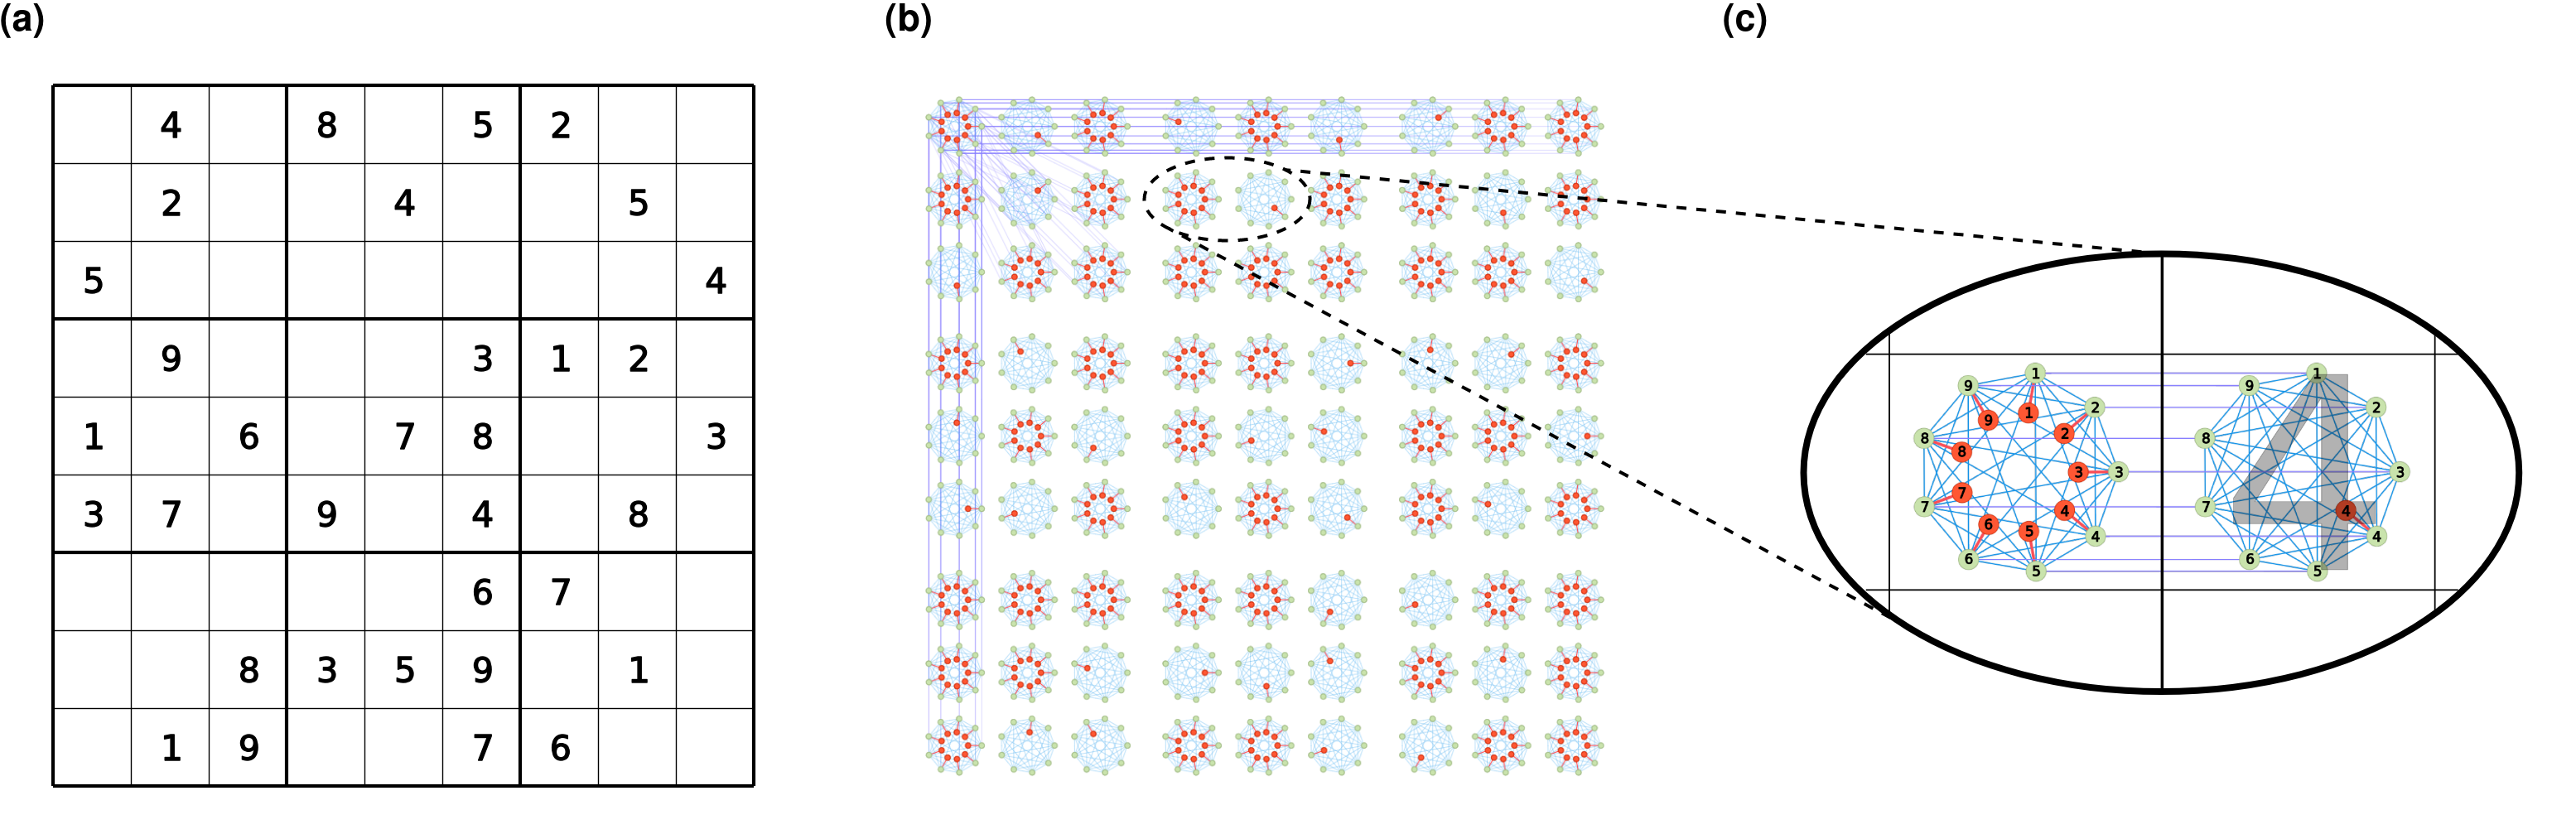.

In [ ]:
# ##### Synaptic connections ##### #
##### Stim-Var excitation #####
for row in range(variables):
    for col in range(variables):
        clue = sudoku[row, col]-1
        weight = np.random.uniform(low=1.4, high=1.6, size=variables*solverPop)
        synapsesExcit = np.diag(weight)
        if clue >= 0:
            mask = np.zeros(variables*solverPop)
            mask[clue*solverPop:(clue+1)*solverPop] = 1
            synapsesExcit = synapsesExcit*np.diag(mask)
        model.add_synapse_population(
            pop_name=f'stimExcit{row}{col}', matrix_type='DENSE',
            source=popStim[row][col], target=popVar[row][col],
            postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
            weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesExcit.flatten()}),
        )

In [ ]:
##### Var-Var internal inhibition #####
for row in range(variables):
    for col in range(variables):
        synapsesInhib = np.random.uniform(low=-0.08, high=0.0, size=(variables*solverPop, variables*solverPop))
        for i in range(variables):
            synapsesInhib[i*solverPop:(i+1)*solverPop, i*solverPop:(i+1)*solverPop] = 0
        model.add_synapse_population(
            pop_name=f'internalInhib{row}{col}', matrix_type='DENSE',
            source=popVar[row][col], target=popVar[row][col],
            postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
            weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesInhib.flatten()}),
        )

A possible effect induced by large neuron populations is the change of the initial clues during the evolution of the system. The very origin of such phenomenon is however to be ascribed to the spiking activity rather than to the population dimension. We indeed observed that changes of the initial clues can be reproduced by acting on neuron parameters like the threshold voltage and the bias current, or on the synaptic connections, which induce a higher spiking activity. 

Interestingly, if the initial clues are changed, the network can still find the correct solution to the new problem. In a sense, the network demonstrates its ability as a problem generator. However, such reformulation and adaptation capability must actually be seen as an issue: the solution found by the network is not related to the problem we want to solve but to a different one. 

As a solution to fix such issue, we removed the lateral inhibition connections toward the initial clue populations, so that lateral inhibition from the activity of other populations is avoided and the change of initial states corresponding to the original constraints is prevented.

In [ ]:
##### Var-Var lateral inhibition #####
indexes = [(row, col) for row in range(variables) for col in range(variables)]
constraints = []
for i, cell1 in enumerate(indexes):
    for j, cell2 in enumerate(indexes):
        if (cell1[0] == cell2[0] or cell1[1] == cell2[1]) and i != j:
            constraints.append((cell1, cell2))
        if (cell2[0]//3 == cell1[0]//3 and cell2[1]//3 == cell1[1]//3) and (cell2[0] != cell1[0] and cell2[1] != cell1[1]) and i != j:
            constraints.append((cell1, cell2))
for (rowSo, colSo), (rowTo, colTo) in constraints:
    if sudoku[rowTo][colTo] == 0 or constraintStabilization is False:
        synapsesInhib = np.zeros(shape=(variables*solverPop, variables*solverPop))
        for i in range(variables):
            synapsesInhib[i*solverPop:(i+1)*solverPop, i*solverPop:(i+1)*solverPop] = np.random.uniform(low=-0.08, high=0.0, size=(solverPop, solverPop))
        model.add_synapse_population(
            pop_name=f'lateralInhib{rowSo}{colSo}{rowTo}{colTo}', matrix_type='DENSE',
            source=popVar[rowSo][colSo], target=popVar[rowTo][colTo],
            postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
            weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesInhib.flatten()}),
        )

## Validation network

### Neuron idling and built-in validation

To address the limitations found in the CSP solver of [Fonseca et al., 2017](https://www.frontiersin.org/journals/neuroscience/articles/10.3389/fnins.2017.00714/full), as well as in the solution validation process, we introduced an additional element playing the role of an auxiliary network. Such a network is composed of $4$ blocks, depicted in Figure below together with the CSP solver. It is responsible of multiple actions aimed at avoiding unnecessary activity and validating the solution found by the main network, namely the CSP solver. First, the *Polisher* block is used to collect and filter out the activity of the main network, so that only the spikes from the most active population are kept; then, the *NetChecker* block verifies if the original constraints have been preserved during the system evolution; third, the *If* block, upon validating the found solution, interrupts the activity of the CSP solver and it activates the final block, called *Memory*, in charge of keeping the activity state corresponding to the validated solution.

The *Polisher* block, introduced to eliminate the background noise produced by the less active populations, consists of a layer whose structure is the same as for the CSP solver except for two key differences: first, a reduced number of neurons per population is used; second, each population receives stimuli from its counterpart in the CSP solver instead of dedicated stimulus populations.

The *NetChecker* is composed by $3 \times 9$ units containing 10 populations: $3$ as the number of constraint types, namely on rows, on columns and for sub-squares; $9$ for the number of rows, columns and sub-squares; $10$ given by $9$ control populations for replicated digits and an additional population, named check population, which is activated if all the constraints are satisfied. The $9$ control populations are connected in a one-to-one scheme with the corresponding populations in the *Polisher* block: each control population models a digit and each unit is connected to all the Sudoku cells along a row, along a column or in a sub-square. For instance, the unit in position (1,4) of the *NetChecker* in Figure below contains the 9 control populations connected to the populations of the fourth row in the *Polisher* according to the digit they represent, and the check population connected to all the populations of the same row.

Once it is ensured that all constraints are satisfied, the *If* block verifies the solution validity with respect to the initial problem. Such block consists of a single layer with two populations of neurons which are activated depending on the `True` or `False` outcome of the constraints conservation check. `False` is obtained if at least one of the $9$ constraint-related populations of the *NetChecker is active; `True` is instead obtained if all the validation populations of the *NetChecker* are active. To ensure that the two populations for `True` and `False` cannot be active at the same time, a winner-take-all scheme is adopted.

If the found solution is validated, the *If* block stops the evolution of the system and it triggers the *Memory* block to save the last state of the CSP solver. Both of these tasks are performed by the *If* block through inhibitory synapses: in the first case, namely to stop the system evolution, the connections are between the first population of the *If* block and all the cells of the CSP solver, while for the activation of the *Memory* block the second population of the *If* block is used.

For the *Memory* block, the same structure as in the case of the CSP solver is adopted, except for the dimension of the neuron populations which is reduced to 3 neurons.
As in the *Polisher*, each population receives stimuli from its counterpart in the CSP solver.
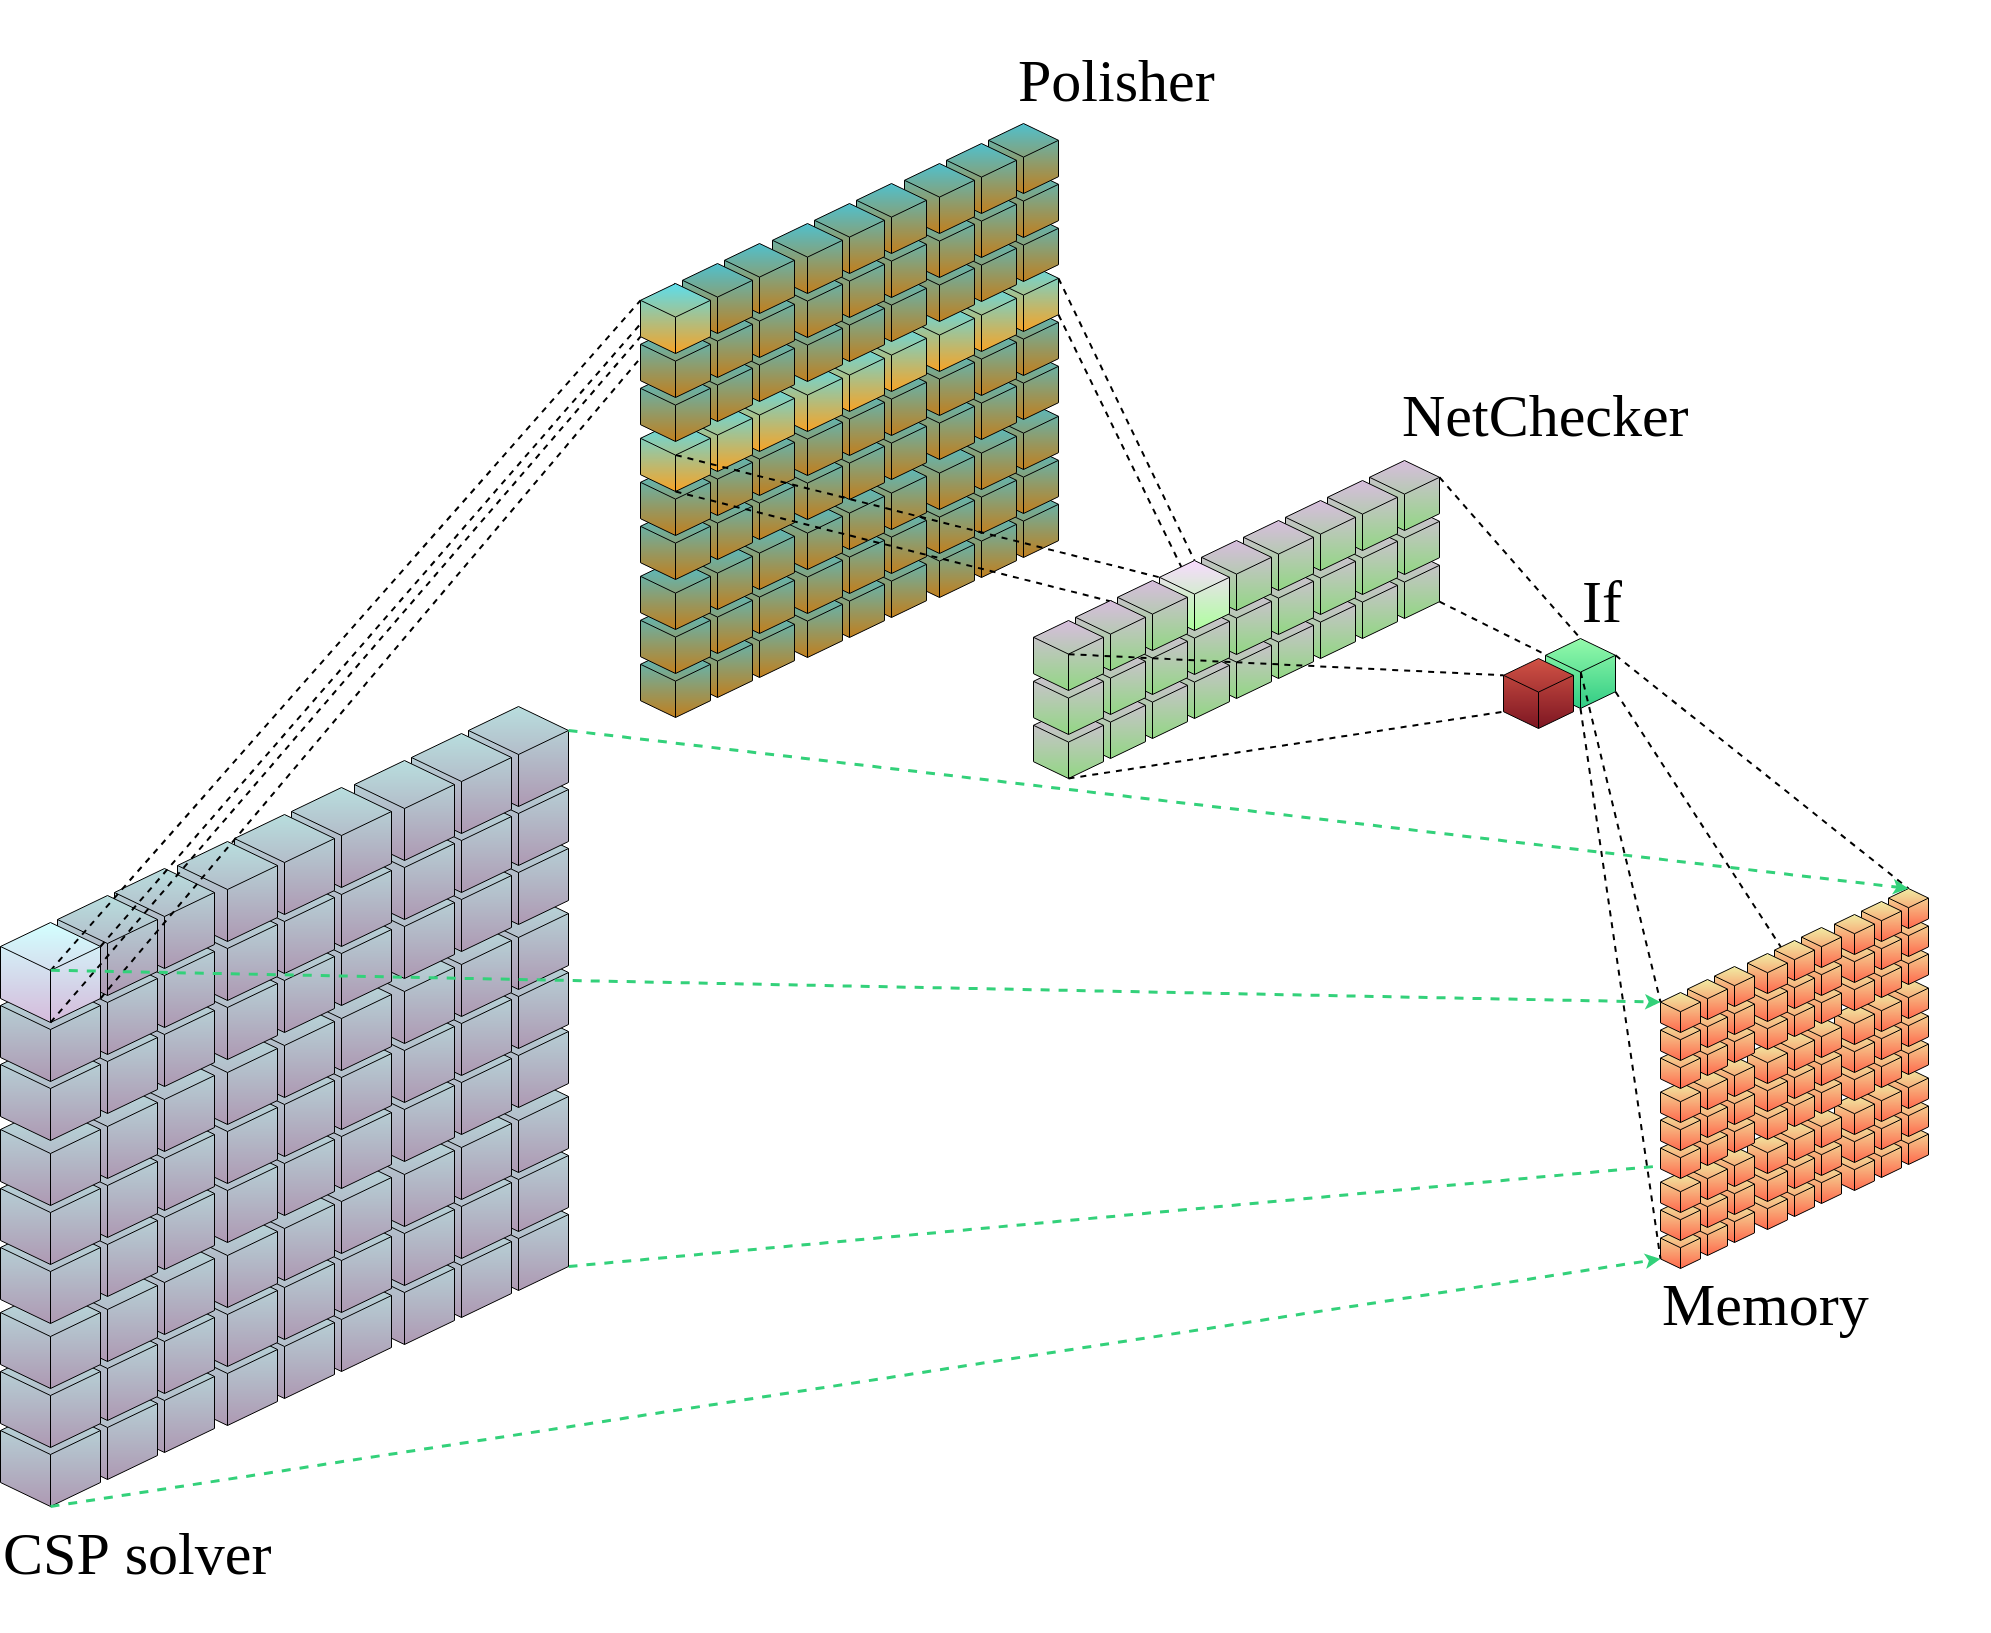

In [ ]:
if builtInValidation is True:
    ##### Neuron parameters #####
    lifParam['Ioffset'] = 0.1
    validationPop = 10

    # ##### Neuron populations ##### #
    popPolisher = [[0 for _ in range(variables)] for _ in range(variables)]
    for row in range(variables):
        for col in range(variables):
            popPolisher[row][col] = model.add_neuron_population(
                pop_name=f'polisher{row}{col}',
                num_neurons=variables*validationPop,
                neuron='LIF',
                params=lifParam, vars=lifVar
            )
    
    popNetChecker = [[0 for _ in range(variables)] for _ in range(3)]
    for c in range(3):
        for v in range(variables):
            popNetChecker[c][v] = model.add_neuron_population(
                pop_name=f'netChecker{c}{v}',
                num_neurons=(variables+1)*validationPop,
                neuron='LIF',
                params=lifParam, vars=lifVar
            )

In [ ]:
if builtInValidation is True:
    ##### Var-Polisher excitation #####
    for row in range(variables):
        for col in range(variables):
            synapsesExcit = np.zeros(shape=(variables*solverPop, variables*validationPop))
            for i in range(variables):
                synapsesExcit[i*solverPop:(i+1)*solverPop, i*validationPop:(i+1)*validationPop] = 1.0
            model.add_synapse_population(
                pop_name=f'polisherExcit{row}{col}', matrix_type='DENSE',
                source=popVar[row][col], target=popPolisher[row][col],
                postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
                weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesExcit.flatten()}),
            )

In [ ]:
if builtInValidation is True:
    ##### Polisher-Polisher internal inhibition #####
    for row in range(variables):
        for col in range(variables):
            synapsesInhib = -1.0*np.ones(shape=(variables*validationPop, variables*validationPop))
            for i in range(variables):
                synapsesInhib[i*validationPop:(i+1)*validationPop, i*validationPop:(i+1)*validationPop] = 0.0
            model.add_synapse_population(
                pop_name=f'polisherInhib{row}{col}', matrix_type='DENSE',
                source=popPolisher[row][col], target=popPolisher[row][col],
                postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
                weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesInhib.flatten()}),
            )

In [ ]:
if builtInValidation is True:
    ##### Row Polisher-NetChecker excitation #####
    for row in range(variables):
        for col in range(variables):
            synapsesExcit = np.zeros(shape=(variables*validationPop, (variables+1)*validationPop))
            for n in range(1, validationPop+1):
                synapsesExcit[:, -n] = 0.15
            for i in range(variables):
                synapsesExcit[i*validationPop:(i+1)*validationPop, i*validationPop:(i+1)*validationPop] = 1.0
            model.add_synapse_population(
                pop_name=f'rowNetChecker{row}{col}', matrix_type='DENSE',
                source=popPolisher[row][col], target=popNetChecker[0][row],
                postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
                weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesExcit.flatten()}),
            )
    
    ##### Col Polisher-NetChecker excitation #####
    for col in range(variables):
        for row in range(variables):
            synapsesExcit = np.zeros(shape=(variables*validationPop, (variables+1)*validationPop))
            for n in range(1, validationPop+1):
                synapsesExcit[:, -n] = 0.15
            for i in range(variables):
                synapsesExcit[i*validationPop:(i+1)*validationPop, i*validationPop:(i+1)*validationPop] = 1.0
            model.add_synapse_population(
                pop_name=f'colNetChecker{row}{col}', matrix_type='DENSE',
                source=popPolisher[row][col], target=popNetChecker[1][col],
                postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
                weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesExcit.flatten()}),
            )
    
    ##### Cel Polisher-NetChecker excitation #####
    mapping = [[] for _ in range(variables)]
    i = 0
    for row in range(variables):
        for col in range(variables):
            if row % 3 == 1 and col % 3 == 1:
                mapping[i].append((row-1, col-1))
                mapping[i].append((row-1, col))
                mapping[i].append((row-1, col+1))
                mapping[i].append((row, col-1))
                mapping[i].append((row, col))
                mapping[i].append((row, col+1))
                mapping[i].append((row+1, col-1))
                mapping[i].append((row+1, col))
                mapping[i].append((row+1, col+1))
                i += 1
    for cel in range(variables):
        for v in range(variables):
            synapsesExcit = np.zeros(shape=(variables*validationPop, (variables+1)*validationPop))
            for n in range(1, validationPop+1):
                synapsesExcit[:, -n] = 0.15
            for i in range(variables):
                synapsesExcit[i*validationPop:(i+1)*validationPop, i*validationPop:(i+1)*validationPop] = 1.0
            mapRow, mapCol = mapping[cel][v]
            model.add_synapse_population(
                pop_name=f'celNetChecker{mapRow}{mapCol}', matrix_type='DENSE',
                source=popPolisher[mapRow][mapCol], target=popNetChecker[2][cel],
                postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
                weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesExcit.flatten()}),
            )
    
    ##### NetChecker-NetChecker inhibition #####
    for c in range(3):
        for v in range(variables):
            synapsesInhib = -1.2*np.ones(shape=((variables+1)*validationPop, (variables+1)*validationPop))
            for i in range(variables+1):
                synapsesInhib[i*validationPop:(i+1)*validationPop, i*validationPop:(i+1)*validationPop] = 0.0
            model.add_synapse_population(
                pop_name=f'netCheckerNetChecker{c}{v}', matrix_type='DENSE',
                source=popNetChecker[c][v], target=popNetChecker[c][v],
                postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
                weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesInhib.flatten()}),
            )

In [ ]:
if builtInValidation is True:
    # ##### Neuron populations ##### #
    popIf = model.add_neuron_population(
        pop_name=f'if',
        num_neurons=2*validationPop,
        neuron='LIF',
        params=lifParam, vars=lifVar
    )

In [ ]:
if builtInValidation is True:
    ##### NetChecker-If excitation #####
    for c in range(3):
        for v in range(variables):
            synapsesExcit = np.zeros(shape=((variables+1)*validationPop, 2*validationPop))
            synapsesExcit[0:9*validationPop, validationPop:] = 11.0
            synapsesExcit[9*validationPop:, 0:validationPop] = 0.02
            model.add_synapse_population(
                pop_name=f'ifExcit{c}{v}', matrix_type='DENSE',
                source=popNetChecker[c][v], target=popIf,
                postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
                weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesExcit.flatten()}),
            )
    
    ##### If-If excitation #####
    synapsesExcit = np.zeros(shape=(2*validationPop, 2*validationPop))
    synapsesExcit[0:validationPop, 0:validationPop] = 0.5
    model.add_synapse_population(
        pop_name=f'ifExcit', matrix_type='DENSE',
        source=popIf, target=popIf,
        postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
        weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesExcit.flatten()}),
    )
    
    ##### If-If inhibition #####
    synapsesInhib = np.zeros(shape=(2*validationPop, 2*validationPop))
    synapsesInhib[0:validationPop, validationPop:] = -1.0
    synapsesInhib[validationPop:, 0:validationPop] = -1.0
    model.add_synapse_population(
        pop_name=f'ifInhib', matrix_type='DENSE',
        source=popIf, target=popIf,
        postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
        weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesInhib.flatten()}),
    )
    
    ##### If-Var inhibition #####
    synapticDelay = []
    for row in range(variables):
        for col in range(variables):
            synapsesInhib = -2.0*np.ones(shape=(2*validationPop, variables*solverPop))
            synapsesInhib[validationPop:, :] = 0
            synapticDelay.append(model.add_synapse_population(
                pop_name=f'ifSolverInhi{row}{col}', matrix_type='DENSE',
                source=popIf, target=popVar[row][col],
                postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
                weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesInhib.flatten()}),
            ))
            synapticDelay[-1].axonal_delay_steps = 400

In [ ]:
if builtInValidation is True:
    # ##### Neuron populations ##### #
    memoryPop = 3
    popMem = [[0 for _ in range(variables)] for _ in range(variables)]
    for row in range(variables):
        for col in range(variables):
            popMem[row][col] = model.add_neuron_population(
                pop_name=f'mem{row}{col}',
                num_neurons=variables*memoryPop,
                neuron='LIF',
                params=lifParam, vars=lifVar
            )
            popMem[row][col].spike_recording_enabled = True

In [ ]:
if builtInValidation is True:
    ##### Var-Mem excitation #####
    for row in range(variables):
        for col in range(variables):
            synapsesExcit = np.zeros(shape=(variables*solverPop, variables*memoryPop))
            for i in range(variables):
                synapsesExcit[i*solverPop:(i+1)*solverPop, i*memoryPop:(i+1)*memoryPop] = 1.0
            model.add_synapse_population(
                pop_name=f'memExcit{row}{col}', matrix_type='DENSE',
                source=popVar[row][col], target=popMem[row][col],
                postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
                weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesExcit.flatten()}),
            )
    
    ##### Mem-mem excitation #####
    for row in range(variables):
        for col in range(variables):
            synapsesExcit = np.zeros(shape=(variables*memoryPop, variables*memoryPop))
            for i in range(variables):
                synapsesExcit[i*memoryPop:(i+1)*memoryPop, i*memoryPop:(i+1)*memoryPop] = 0.6
            model.add_synapse_population(
                pop_name=f'memInteExcit{row}{col}', matrix_type='DENSE',
                source=popMem[row][col], target=popMem[row][col],
                postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
                weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesExcit.flatten()}),
            )
            
   ##### Mem-Mem lateral inhibition #####
    for row in range(variables):
        for col in range(variables):
            synapsesInhib = -0.3*np.ones(shape=(variables*memoryPop, variables*memoryPop))
            for i in range(variables):
                synapsesInhib[i*memoryPop:(i+1)*memoryPop, i*memoryPop:(i+1)*memoryPop] = 0.0
            model.add_synapse_population(
                pop_name=f'memInteInhib{row}{col}', matrix_type='DENSE',
                source=popMem[row][col], target=popMem[row][col],
                postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
                weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesInhib.flatten()}),
            )

    ##### If-Mem inhibition #####
    for row in range(variables):
        for col in range(variables):
            synapsesInhib = -0.6*np.ones(shape=(2*validationPop, variables*memoryPop))
            synapsesInhib[0:validationPop, :] = 0
            model.add_synapse_population(
                pop_name=f'ifInhiMem{row}{col}', matrix_type='DENSE',
                source=popIf, target=popMem[row][col],
                postsynaptic_init=init_postsynaptic('ExpCurr', {"tau": 5.0}),
                weight_update_init=init_weight_update('StaticPulse', {}, {'g': synapsesInhib.flatten()}),
            )

## Simulation

In [ ]:
timeExecutionStart = time.time()
timeSimulation = 60  # s
timeSteps = int(timeSimulation*1e3)
model.build()
model.load(num_recording_timesteps=timeSteps)
while model.timestep < timeSteps:
    model.step_time()
model.pull_recording_buffers_from_device()
timeExecutionEnd = time.time()
timeExecution = timeExecutionEnd-timeExecutionStart

## Analysis

Finally, the built-in validation introduced with our fully spiking pipeline allows to avoid the binning procedure adopted by [Fonseca et al., 2017](https://www.frontiersin.org/journals/neuroscience/articles/10.3389/fnins.2017.00714/full) to validate the solutions. By replacing it with the *NetChecker*, the computational effort required to analyze the extracted spikes on external hardware is completely prevented.

In [ ]:
binWidth = 100
assert timeSteps % binWidth == 0
binsTime = np.arange(0, timeSteps+binWidth, binWidth)

flagSol, spikeCount = False, 0
solverBins = np.zeros(shape=(binsTime.size-1, variables, variables), dtype=np.uint8)
if builtInValidation is False:
    ##### Solution/Initial clue validation #####
    binsPop = np.arange(0, (variables+1)*solverPop, solverPop)
    for row in range(variables):
        for col in range(variables):
            times, index = popVar[row][col].spike_recording_data[0]
            wta = np.histogram2d(index, times, (binsPop, binsTime))[0]
            solverBins[:, row, col] = np.argmax(wta, axis=0)+1
            spikeCount += times.size

    for b in range(binsTime.size-1):
        if np.array_equal(solverBins[b], sudokuSol) is True:
            flagSol = True
            break

if builtInValidation is True:
    ##### Memory validation #####
    binsPop = np.arange(0, (variables+1)*memoryPop, memoryPop)
    for row in range(variables):
        for col in range(variables):
            times, index = popMem[row][col].spike_recording_data[0]
            wta = np.histogram2d(index, times, (binsPop, binsTime))[0]
            solverBins[:, row, col] = np.argmax(wta, axis=0)+1
            spikeCount += times.size

    for b in range(binsTime.size-1):
        if np.array_equal(solverBins[b], sudokuSol) is True:
            flagSol = 1
            break

In [ ]:
print('Selected option')
print(f'+-----------------------------------------------+')
print(f'|\tDifficulty selected\t|\t{difficulty}\t|')
print(f'+-----------------------------------------------+')
print(f'|\tPuzzle type selected\t|\t{puzzleType}\t|')
print(f'+-----------------------------------------------+')
print(f'|\tConstraint stab.\t|\t{constraintStabilization}\t|')
print(f'+-----------------------------------------------+')
print(f'|\tBuilt-in Validation\t|\t{builtInValidation}\t|')
print(f'+-----------------------------------------------+')

In [ ]:
print('Evaluation metrics')
print(f'+-----------------------------------------------+')
print(f'|\tSolution found  \t|\t{bool(flagSol)}\t|')
print(f'+-----------------------------------------------+')
print(f'|\tSpike counting  \t|\t{spikeCount}\t|')
print(f'+-----------------------------------------------+')
print(f'|\tTime simulation \t|\t{np.round(timeSimulation, 2)}s\t|')
print(f'+-----------------------------------------------+')
print(f'|\tTime execution  \t|\t{np.round(timeExecution, 2)}s\t|')
print(f'+-----------------------------------------------+')

# Confidence 

In [ ]:
confidenceTmp = np.where(solverBins[1:, :, :]-solverBins[:-1, :, :]!=0, 1, 0)
normalization = np.sum(confidenceTmp, axis=0)
normalization = np.expand_dims(normalization, axis=0)
normalization = np.where(normalization==0, 1, normalization)
confidenceTmp = confidenceTmp/normalization
confidenceTmp = np.cumsum(confidenceTmp, axis=0)
for row in range(variables):
    for col in range(variables):
        if confidenceTmp[-1, row, col] == 0:
            confidenceTmp[:, row, col] = 1
confidence = np.zeros(solverBins.shape)
confidence[0, :, :] = confidenceTmp[0]
confidence[1:, :, :] = confidenceTmp
confidence = confidence/2.3+0.45

In [ ]:
##### Sudoku Solution plot setting #####
plt.figure(figsize=(12, 9.6))
cmap = matplotlib.cm.get_cmap('brg')

for t in range(solverBins.shape[0]):
    plt.cla()
    if t == 0:
        data = np.zeros((10, 10))
        data[0, 0] = confidence.min()
        data[0, 1] = confidence.max()

        custom_colors = cmap(np.linspace(confidence.min(), confidence.max(), 1000))
        bounds = np.linspace(0, 1, 1000)

        cmap = matplotlib.colors.ListedColormap(custom_colors)
        norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

        heatmap = plt.imshow(data, cmap=cmap, norm=norm)
        cbar = plt.colorbar(heatmap, ticks=[i/10 for i in range(11)])
        cbar.ax.tick_params(labelsize=8)
        cbar.set_label('Confidence', fontsize=12)
        plt.cla()
    plt.title(f'Sudoku Solution - {difficulty.capitalize()} {puzzleType}', fontdict={'fontsize': 30})
    for i, (x, y) in enumerate(positions):
        digit = solverBins[t].flatten()[i]
        color = confidence[t].flatten()[i]
        plt.scatter(x=x, y=y, marker='s', color=cmap(color), s=digitsize+2500)
        plt.scatter(x=x, y=y, marker=f'${digit}$', color='#FFFFFF', s=digitsize)
        if sudoku.flatten()[i] != 0:
            plt.scatter(x=x, y=y, marker=f'${digit}$', color='#000000', s=digitsize)
    
           

    for i, axis in enumerate(axes):
        linewidth = 1
        if i%3 == 0:
            linewidth = maxwidth
        plt.vlines(x=axis-offset, ymin=-space-offset, ymax=space+offset, linewidth=linewidth, colors='#000000')
        plt.hlines(y=axis-offset, xmin=-space-offset, xmax=space+offset, linewidth=linewidth, colors='#000000')
    plt.vlines(x=axes[-1]+offset, ymin=-space-offset, ymax=space+offset, linewidth=maxwidth, colors='#000000')
    plt.hlines(y=axes[-1]+offset, xmin=-space-offset, xmax=space+offset, linewidth=maxwidth, colors='#000000')
    
    plt.xticks([])
    plt.yticks([])
    plt.box(False)
    plt.text(-1120, -1240, f'Timestep {t+1}/{solverBins.shape[0]}', fontsize=15)
    if not np.array_equal(sudokuSol, solverBins[t]):
        plt.text(820, -1240, f'INVALID', fontsize=15, fontweight='bold', color='#FF0000')
    else:
        plt.text(905, -1240, f'VALID', fontsize=15, fontweight='bold', color='#00FF00')
    
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [ ]:
os.system('rm -r .*_CODE')

## Cite us

If you use this code in your academic work, please cite the following article:

> Pignari, R., Fra, V., Macii, E., & Urgese, G. (2025). Efficient solution validation of constraint satisfaction problems on neuromorphic hardware: the case of Sudoku puzzles. IEEE Transactions on Artificial Intelligence. [10.1109/TAI.2025.3536428](https://doi.org/10.1109/TAI.2025.3536428)

Formato BibTeX:
```bibtex
@article{pignari2025efficient,
  title={Efficient solution validation of constraint satisfaction problems on neuromorphic hardware: the case of Sudoku puzzles},
  author={Pignari, Riccardo and Fra, Vittorio and Macii, Enrico and Urgese, Gianvito},
  journal={IEEE Transactions on Artificial Intelligence},
  year={2025},
  publisher={IEEE}
}
```